In [1]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.6 MB/s eta 0:00:00


In [9]:
from diffusers import SemanticStableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Initialize the device (e.g., 'cuda' or 'cpu')
device = 'cuda'

# Load the Diffusion Model pipeline
pipe = SemanticStableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)

# Define the prompts and editing prompts
# Define the prompts and editing prompts
prompts = [
    "A vibrant kite rests against a wooden bench, waiting to be set free on a breezy afternoon.",
    "Lifted by the wind, the kite glides gracefully through the air, trailing a long tail behind.",
    "High above the rooftops, the kite dances among the clouds, embracing the freedom of flight.",
    "As the sun begins to set, the kite descends gently to the ground, its journey coming to a peaceful end."
]

editing_prompts = [
    "Brightly colored fabric flutters in the wind as the kite is unfurled from its packaging.",
    "The wind catches the kite's wings, propelling it higher into the sky with each gust.",
    "Against the backdrop of the setting sun, the kite performs intricate aerial maneuvers, a sight to behold.",
    "As twilight falls, the kite gracefully lands on the grassy field, its mission accomplished."
]

# Set up the generator
gen = torch.Generator(device=device)

# Set a seed for reproducibility (optional)
gen.manual_seed(21)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Number of generated images: 4
Displaying image 1/4
Displaying image 2/4
Displaying image 3/4
Displaying image 4/4


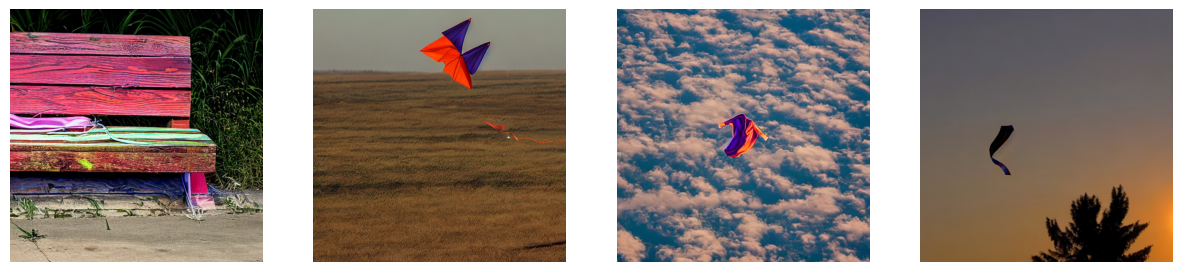

In [10]:
# Generate images based on the prompts and editing prompts
images = []
for prompt, editing_prompt in zip(prompts, editing_prompts):
    try:
        out = pipe(
            prompt=prompt,
            generator=gen,
            num_images_per_prompt=1,
            guidance_scale=7,
            editing_prompt=[editing_prompt],
            reverse_editing_direction=[False],
            edit_warmup_steps=[10],
            edit_guidance_scale=[4],  # Ensure this is of the correct data type
            edit_threshold=[0.99],
            edit_momentum_scale=0.3,
            edit_mom_beta=0.6,
            edit_weights=[1]
        )
        images.extend(out.images)
    except Exception as e:
        print(f"Error generating images: {e}")

# Display all generated images
num_images = len(images)
print(f"Number of generated images: {num_images}")

plt.figure(figsize=(15, 10))
for i, image in enumerate(images):
    print(f"Displaying image {i+1}/{num_images}")
    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

In [8]:
num_images = len(images)
print(f"Number of generated images: {num_images}")

Number of generated images: 4
